In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.python.data import Dataset

#tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
dt=pd.read_csv('../Datasets/delhipm2.5.csv')
print(dt.head())
dt.describe()

   Year  F_Month  F_Day  UTC Hour  PM2.5  Month  Day    acq_date
0  2016        3      3         8  123.8      3    3  03-03-2016
1  2016        3      3         9  141.6      3    3  03-03-2016
2  2016        3      3        10  133.9      3    3  03-03-2016
3  2016        3      3        11  134.5      3    3  03-03-2016
4  2016        3      3        12  142.7      3    3  03-03-2016


,Year,F_Month,F_Day,UTC Hour,PM2.5,Month,Day
count,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000,28805.000000
mean,2017.447908,6.631002,15.581219,11.491685,106.533446,6.631002,15.581219
std,1.062240,3.262733,8.744167,6.923078,86.011085,3.262733,8.744167
min,2016.000000,1.000000,1.000000,0.000000,4.600000,1.000000,1.000000
25%,2017.000000,4.000000,8.000000,5.000000,49.700000,4.000000,8.000000
50%,2017.000000,7.000000,16.000000,11.000000,79.300000,7.000000,16.000000
75%,2018.000000,9.000000,23.000000,18.000000,136.600000,9.000000,23.000000
max,2019.000000,12.000000,31.000000,23.000000,987.900000,12.000000,31.000000


In [4]:
data=pd.DataFrame()
data=dt[['Year','Month','Day','UTC Hour','acq_date','PM2.5']]
data.head()

,Year,Month,Day,UTC Hour,acq_date,PM2.5
0,2016,3,3,8,03-03-2016,123.8
1,2016,3,3,9,03-03-2016,141.6
2,2016,3,3,10,03-03-2016,133.9
3,2016,3,3,11,03-03-2016,134.5
4,2016,3,3,12,03-03-2016,142.7


In [5]:
type(data['acq_date'][0])

str

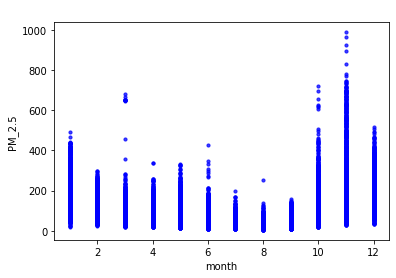

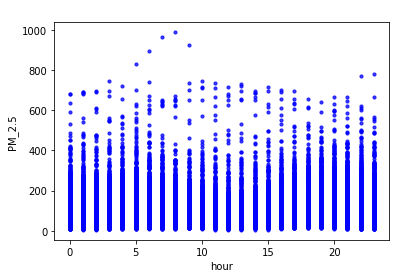

In [6]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Mon=data['Month']
Pm=data['PM2.5']
Hr=data['UTC Hour']    
scatterplot(Mon,Pm,'month','PM_2.5')
scatterplot(Hr,Pm,'hour','PM_2.5')

In [7]:
b=data.groupby('Month').count()
b

,Year,Day,UTC Hour,acq_date,PM2.5
Month,,,,,
1,1940,1940,1940,1940,1940
2,1738,1738,1738,1738,1738
3,2618,2618,2618,2618,2618
4,2112,2112,2112,2112,2112
5,2880,2880,2880,2880,2880
6,2551,2551,2551,2551,2551
7,2741,2741,2741,2741,2741
8,2672,2672,2672,2672,2672
9,2635,2635,2635,2635,2635


In [8]:
Aggregation={'PM2.5':'mean'}
a=pd.DataFrame()
a=data.groupby(['Year','Month','Day']).agg(Aggregation).reset_index()
a["acq_date"] = data["acq_date"]
a.head()
#type(a['acq_date'][0])

,Year,Month,Day,PM2.5,acq_date
0,2016,3,3,135.720000,03-03-2016
1,2016,3,4,62.595833,03-03-2016
2,2016,3,5,54.475000,03-03-2016
3,2016,3,6,84.350000,03-03-2016
4,2016,3,7,92.941667,03-03-2016


In [9]:
fire_data = pd.read_pickle("fire_data.pkl")

In [10]:
fire_data.head()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day,Month,Year,acq_date
0,31.258585,73.542217,310.346341,1.114634,821.512195,59.609756,293.568293,10.341463,1.0,1.0,2016.0,01-01-2016
1,31.108153,72.678637,306.000000,1.313333,710.366667,58.300000,287.846667,13.253333,2.0,1.0,2016.0,01-01-2016
2,31.202693,75.962917,308.843103,1.222414,807.017241,58.500000,291.356897,12.436207,3.0,1.0,2016.0,01-01-2016
3,30.361394,72.666141,307.347059,1.476471,610.411765,56.764706,288.376471,13.805882,4.0,1.0,2016.0,01-01-2016
4,30.755435,76.612978,307.998039,1.219608,795.039216,60.450980,293.150980,9.107843,5.0,1.0,2016.0,01-01-2016


In [11]:
type(fire_data['acq_date'][0])

str

In [12]:
combined = pd.merge(data, fire_data, on="acq_date", how="inner")

In [13]:
combined

,Year_x,Month_x,Day_x,UTC Hour,acq_date,PM2.5,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp,Day_y,Month_y,Year_y


In [14]:
Aggregation={'PM2.5':'mean'}
combined_data=pd.DataFrame()
combined_data=combined.groupby(['Year_x','Month_x','Day_x']).agg(Aggregation).reset_index()
# a["acq_date"] = data["acq_date"]
combined_data.head()
#type(a['acq_date'][0])

,Year_x,Month_x,Day_x,PM2.5
0,2017,5,1,92.170833
1,2017,5,2,133.978261
2,2017,5,3,119.283333
3,2017,5,4,136.308696
4,2017,5,5,159.175000


In [15]:
columns = list(['latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])

combined_data[columns] = combined[columns]

In [16]:
combined_data.head()

,Year_x,Month_x,Day_x,PM2.5,latitude,longitude,brightness,scan,confidence,bright_t31,frp
0,2017,5,1,92.170833,29.7427,76.6679,328.7,2.9,68,311.5,48.2
1,2017,5,2,133.978261,30.4988,74.0669,333.4,1.9,77,312.7,33.6
2,2017,5,3,119.283333,30.2280,75.1271,330.2,2.3,73,315.3,28.3
3,2017,5,4,136.308696,30.5747,75.5177,328.7,2.3,73,312.8,27.4
4,2017,5,5,159.175000,30.4250,75.3941,334.0,2.3,80,313.5,47.6


In [17]:
features = list(['Year_x', 'Month_x', 'Day_x', 'latitude', 'longitude', 'brightness', 'scan', 'confidence', 'bright_t31', 'frp'])


In [18]:
feature_set = combined_data[features]


In [19]:
target = combined_data['PM2.5']

In [20]:
target.describe()

count    428.000000
mean     129.099050
std       79.294055
min       18.907143
25%       71.989583
50%      107.543750
75%      170.918750
max      546.900000
Name: PM2.5, dtype: float64

In [ ]:
feature_set.head()

In [24]:
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(feature_set)

scaler=StandardScaler()#instantiate
scaler.fit(combined_data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(combined_data)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("after scaling minimum", X_scaled.min(axis=0)) 

from sklearn.decomposition import PCA

pca = PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

X_pca = pd.DataFrame(X_pca)
X_pca.head()

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

target_categorical = []
for value in target:
    if value > 18 and value < 72:
        target_categorical.append(0)
    elif value > 72 and value < 120:
        target_categorical.append(1)
    else:
        target_categorical.append(2)

target_categorical = pd.DataFrame(target_categorical)

In [96]:
target_categorical.head()

,0
0,1
1,2
2,1
3,2
4,2


c:\users\meeta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


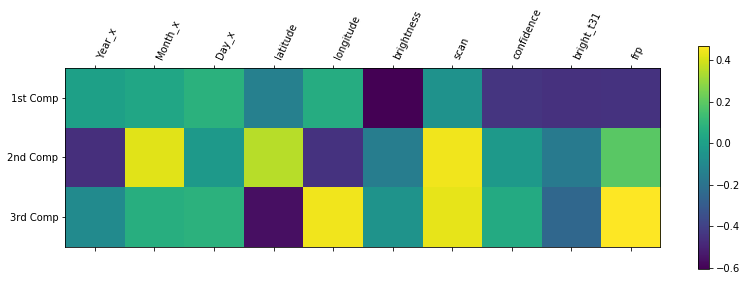

In [97]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(11,features,rotation=65, ha="left")
plt.tight_layout()
plt.show() 

In [99]:
from apyori import apriori

In [100]:
records = []
for i in range(0, len(combined_data)):
    records.append([str(combined_data.values[i,j]) for j in range(0, 11)])

In [ ]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
print(len(association_rules))